## Projet 2 :Analyse des données de systèmes éducatifs
- Valider la qualité de jeu de données en terme de (valeurs manquantes et dupliquées)
- Décrire les informations contenues dans les 5 dataset (nombre de lignes , nombre de colonnes, tupe de chaque donnée..)
- Répondre a la problèmatique tte en analysant les données qui semble pertinente.
- Calcul de la moyenne et mediane et ecart-type 

### Importation des bibliothèque

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Exploratory Data Analysis

In [2]:
df= pd.read_csv('EdStatsCountry-Series.csv')
df1 = pd.read_csv('EdStatsData.csv')
df2 = pd.read_csv('EdStatsSeries.csv')
df3 = pd.read_csv('EdStatsFootNote.csv')
df4 = pd.read_csv('EdStatsCountry.csv')
# on fait des copies pour  chaque dataset:
data = df1.copy()
series = df2.copy()
note = df3.copy()
country = df4.copy()
country_series =df.copy()

#### Déscription des données de chaque data:

## DataFrame : EdStatsCountry-Series

In [3]:
country_series.head(3)
#country.tail()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN


In [4]:
country_series.shape

(613, 4)

In [5]:
country_series.dtypes.value_counts()

object     3
float64    1
Name: count, dtype: int64

In [6]:
country_series.isnull().sum()

CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64

In [7]:
country_series['CountryCode'].value_counts()

CountryCode
MDA    18
GEO    18
CYP    12
SRB    12
MUS    12
       ..
GRL     2
GTM     2
GUM     2
HKG     2
ZWE     2
Name: count, Length: 211, dtype: int64

In [8]:
country_series.drop('Unnamed: 3',axis = 1,inplace = True)
country_series.head()

,CountryCode,SeriesCode,DESCRIPTION
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...


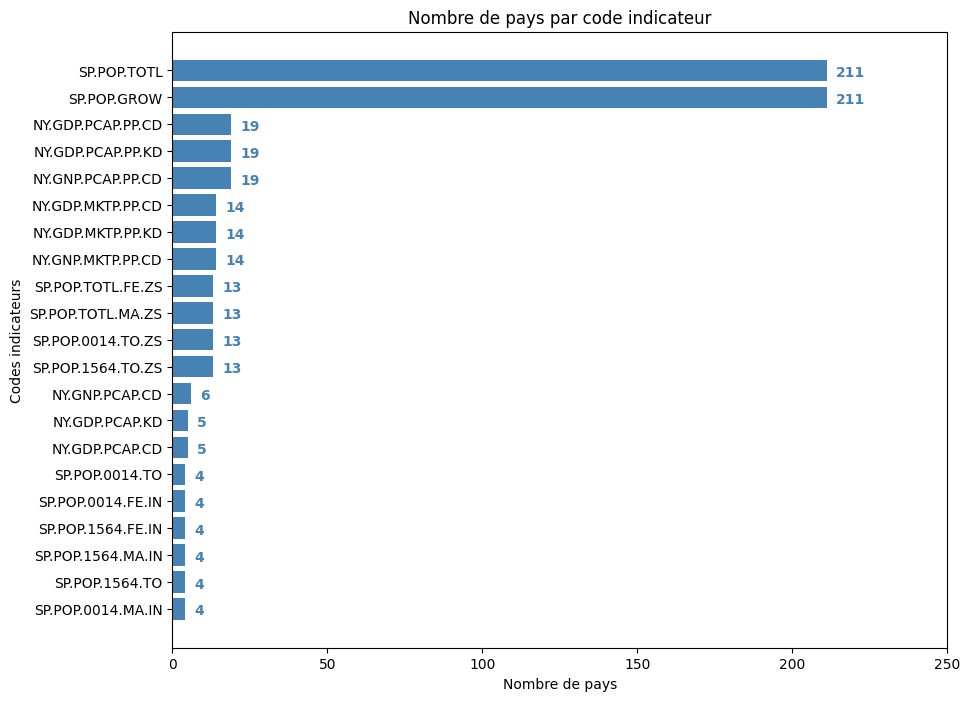

In [9]:
# Regroupement des pays par code indicateur et des pays par description

figure = plt.figure(figsize = (10,8)) 
serie_code = country_series.groupby('SeriesCode')[['CountryCode']].count().reset_index().sort_values(by='CountryCode')['SeriesCode']
nb_pays_par_serie_code=country_series.groupby('SeriesCode')[['CountryCode']].count()['CountryCode'].sort_values()
plt.barh(y = serie_code, width=nb_pays_par_serie_code, color='SteelBlue')
for i, v in enumerate(nb_pays_par_serie_code):
    plt.text(v + 3, i - .22, str(v), color='SteelBlue', fontsize=10, fontweight='bold')
plt.title('Nombre de pays par code indicateur', fontsize=12)
plt.xlabel('Nombre de pays', fontsize=10)
plt.ylabel('Codes indicateurs', fontsize=10)
plt.tick_params(labelsize=10)
plt.xlim([0, 250])
plt.grid(False)
plt.show()

### Analyse des dataframe:

##### 1)-Dataframe EdstatsData:

- je commence par afficher les 2 premieres lignes du dataframe Edstatsdata

In [10]:
data.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On voit que:
- des informations sur les noms de pays.
- des information sur code de pays.
- Nom des indicateurs et code des indicateurs .
- des années de 1970 jusqu'a 2100.
- bcp de valeurs non renseignées.

In [11]:
data.shape

(886930, 70)

- il y'a 886930 lignes et 70 colonnes.

In [12]:
data.dtypes.value_counts()

float64    66
object      4
Name: count, dtype: int64

In [13]:
data.isnull().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64

<Axes: >

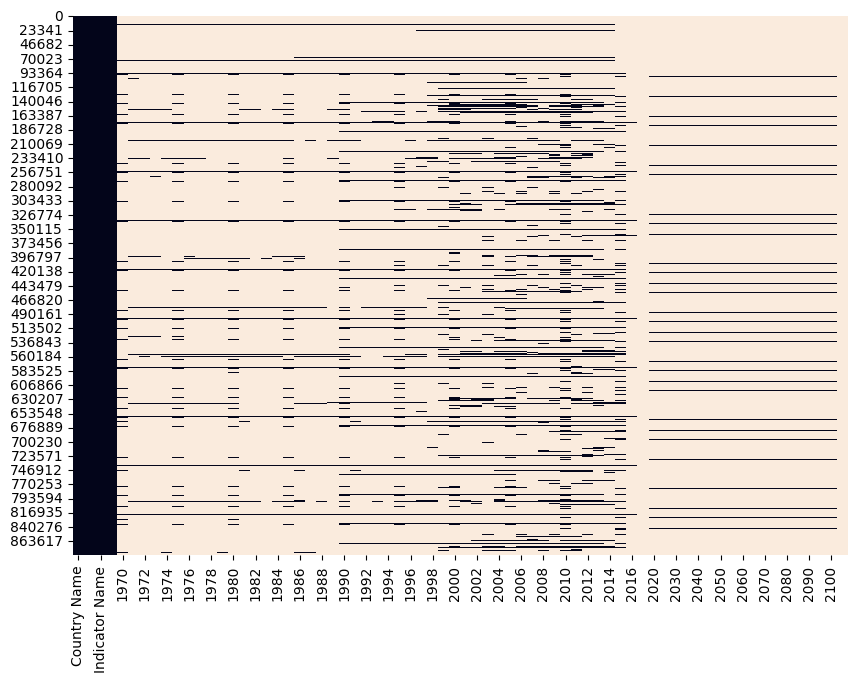

In [14]:
plt.figure(figsize = (10, 7))
sns.heatmap(data.isna(),cbar = False)
# on vois des lignes continues donc ça sens une relation entre ses variables.


- le jeux de données se compose de 2 plages d'années:
* 1970-2017.
* 2020-2100.
* données renseigné dans les années 2015 et 2010 paraport au d'autres année.

In [15]:
liste_pays = data["Country Name"].unique()
print(f'Nombre de pays  dans ce jeu de données : {len(liste_pays)}')
liste_pays[:35]

Nombre de pays  dans ce jeu de données : 242


array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba'],
      dtype=object)

#### Identifications des données dupliquées:


In [16]:
duplicate = data.duplicated(subset = ['Country Code','Indicator Code'])

if True in list(duplicate.unique()):
    print("données dupliquèes dans ce jeu de données.")
else:
    print("aucune données dupliquée dans ce jeu de données.")


aucune données dupliquée dans ce jeu de données.


- Donc,il y'a aucune données dupliqué.

In [17]:
# Verifier le nombre d'indicateur dans EdstatsData : 
indicateur = data['Indicator Code'].unique()
print(f"il y'a trouve :  {len(indicateur)} indicateur dans EDstatsData")


il y'a trouve :  3665 indicateur dans EDstatsData


- impossible d'analysie tout ces indicateur , on devrait selectionner les plus pertinents pour notre analyse


In [18]:
liste_code_indicator = sorted(list(data["Indicator Code"].unique()))
pd.set_option("display.max_colwidth",1000)
data[["Indicator Name","Indicator Code"]].head(15)

,Indicator Name,Indicator Code
0,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2
1,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F
2,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI
3,"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M
4,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR
5,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE
6,"Adjusted net enrolment rate, primary, gender parity index (GPI)",UIS.NERA.1.GPI
7,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA
8,"Adjusted net enrolment rate, upper secondary, both sexes (%)",UIS.NERA.3
9,"Adjusted net enrolment rate, upper secondary, female (%)",UIS.NERA.3.F


#### plusieurs catégories d'indicateur:
    - Sexe.
    - Femme.
    - Hommes.
    - parité de genre
    - ....

### Il y a 3665 indicateurs tous liés à l'éducation selon la catégorie d'âge, le genre, le milieu de vie(rural/urbain) :
  1-des indicateurs concernant la petite enfance: taux de fréquentation, taux de scolarisation....
  
  2-des indicateurs concernant le primaire:taux d'achèvement, taux de scolarisation, taux d'admission...
  
  3-des indicateurs concernant le secondaire: taux d'achèvement, taux de scolarisation...
  
  4-des indicateurs concernant l'Enseignement professionnel et post secondaire non tertiaire: inscription, taux de scolarisation...
  
  5-des indicateurs concernant l'Enseignement tertiaire: inscription, taux de fréquentation...
  
  6-des indicateurs concernant les enseignants : salaires, ratio élèves/enseignants....
  
  7-des indicateurs concernant les dépenses liées à l'éducation : rémunérations, investissements dans les établissements...
  
  8-des indicateurs concernant l'Alphabétisation: population analphabète, taux d'alphabétisation...
  
  9-des indicateurs concernant les résultats d'apprentissage:nombreux indicateurs en lecture, compréhension, mathématiques....
  
  10-des indicateurs concernant la réalisation: nombre moyen d'années d'études,pourcentage de population ayant fait des études supérieures....
  
  11-des indicateurs concernant les compétences technologiques: proportion de jeunes et d'adultes qui ont connecté et installé de nouveaux appareils...
  
  12-des indicateurs concernant la population: croissance démographique, population...
  
  13-des indicateurs concernant la main d'oeuvre:population active, chômage...
  
  14-des indicateurs concernant le contexte:durée de scolarité obligatoire,PIB par habitant...
  
  15-des indicateurs concernant la sécurité à l'école/violence: nombre d'attaques contre les étudiants, pourcentage d'élèves victimes d'intimidation...
  
  16-des indicateurs concernant les politiques mises en place: politique de développement de la petite enfance, santé scolaire....
  
  17-des indicateurs concernant la réalisation mondiale:score en maths, score en lecture...
  
  18-des indicateurs concernant la pauvreté de l'apprentissage: enfants non scolarisés...
  
  19-des indicateurs concernant l'Egalité en matière d'éducation:nombre moyen d'années de scolarité par groupe d'âge, par genre, taux de fréquentation....
  
    

##### 2)-Dataframe EdstatsSeries :

In [19]:
series.head(1)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
series.shape

(3665, 21)

In [21]:
series.dtypes.value_counts()

object     15
float64     6
Name: count, dtype: int64

In [22]:
series.isnull().sum()

Series Code                               0
Topic                                     0
Indicator Name                            0
Short definition                       1509
Long definition                           0
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Source                                    0
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
Unnamed: 20                            3665
dtype: int64

<Axes: >

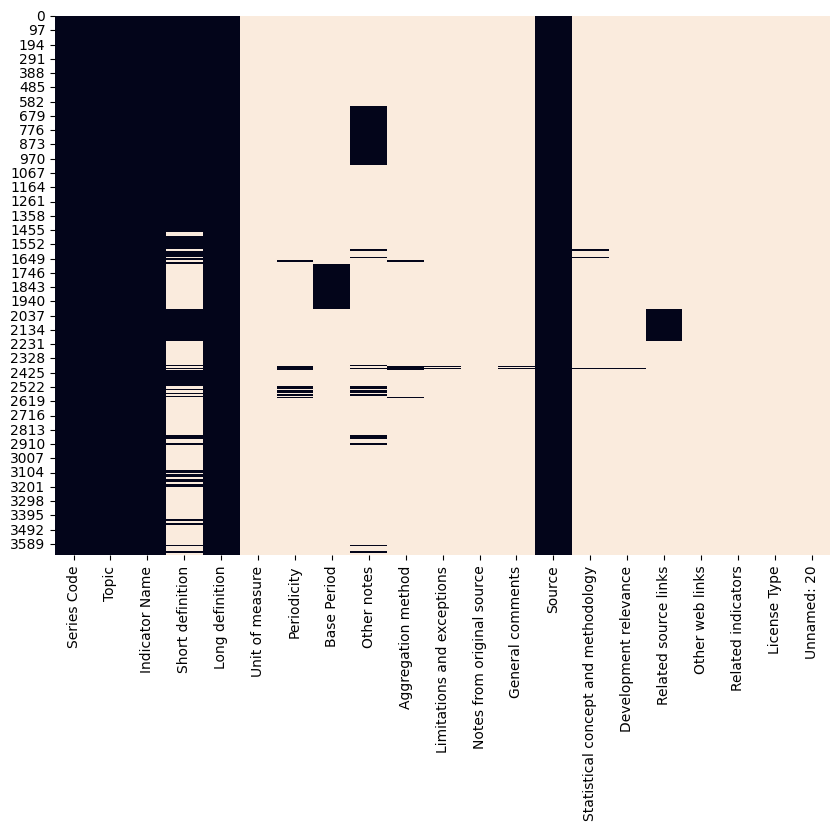

In [23]:
plt.figure(figsize = (10,7))
sns.heatmap(series.isna(),cbar = False)

In [24]:
# porcentage des valeurs nulles da la dataframe:
(series.isna().sum() /series.shape[0]).sort_values(ascending=True)

Series Code                            0.000000
Topic                                  0.000000
Indicator Name                         0.000000
Long definition                        0.000000
Source                                 0.000000
Short definition                       0.411733
Other notes                            0.849386
Base Period                            0.914325
Related source links                   0.941337
Periodicity                            0.972988
Aggregation method                     0.987176
Statistical concept and methodology    0.993724
Limitations and exceptions             0.996180
General comments                       0.996180
Development relevance                  0.999181
Notes from original source             1.000000
License Type                           1.000000
Unit of measure                        1.000000
Other web links                        1.000000
Related indicators                     1.000000
Unnamed: 20                            1

In [25]:
# je filtre la dataframe selon le porcentage des nan qui sont inferieur a 40%:
series = series[series.columns[series.isna().sum() /series.shape[0] < 0.4]]
series.shape

(3665, 5)

- je garde que 5 colonnes. ce sont des colonnes qui contient pas des valeurs nulle est aussi qui donne des infos sur ce jeux de donnée

<Axes: >

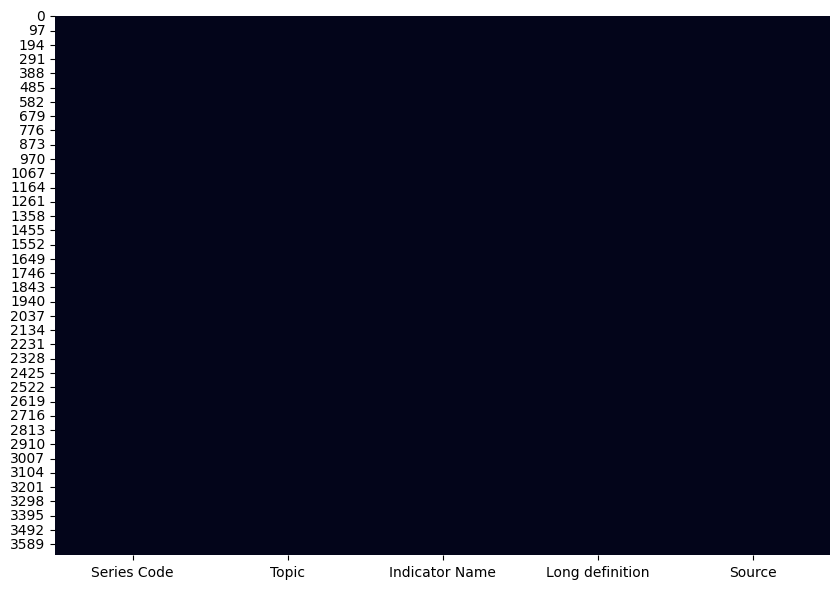

In [26]:
plt.figure(figsize = (10,7))
sns.heatmap(series.isna(),cbar = False)

In [27]:
series.head(3)

,Series Code,Topic,Indicator Name,Long definition,Source
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15+ with no education,Percentage of female population age 15+ with no education,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/


##### 3)-Dataframe EdstatsFootNote:

In [28]:
note.head(3)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN


In [29]:
note.shape

(643638, 5)

In [30]:

note['Year'].nunique

<bound method IndexOpsMixin.nunique of 0         YR2001
1         YR2005
2         YR2000
3         YR2004
4         YR2006
           ...  
643633    YR2007
643634    YR2014
643635    YR2015
643636    YR2017
643637    YR2017
Name: Year, Length: 643638, dtype: object>

In [31]:
note.dtypes.value_counts()

object     4
float64    1
Name: count, dtype: int64

In [32]:
note.isnull().sum()

CountryCode         0
SeriesCode          0
Year                0
DESCRIPTION         0
Unnamed: 4     643638
dtype: int64

In [33]:
# Rendre la colonne Year en type integer et enlever YR:
note["Year"] = note["Year"].str[2:].astype(str).astype(int)

##### 4)-DataFrame EdstatsCountry:

In [34]:
country.head(2)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN


In [35]:
country.shape

(241, 32)

In [36]:
country.dtypes.value_counts()

object     28
float64     4
Name: count, dtype: int64

In [37]:
country.isnull().sum()

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

<Axes: >

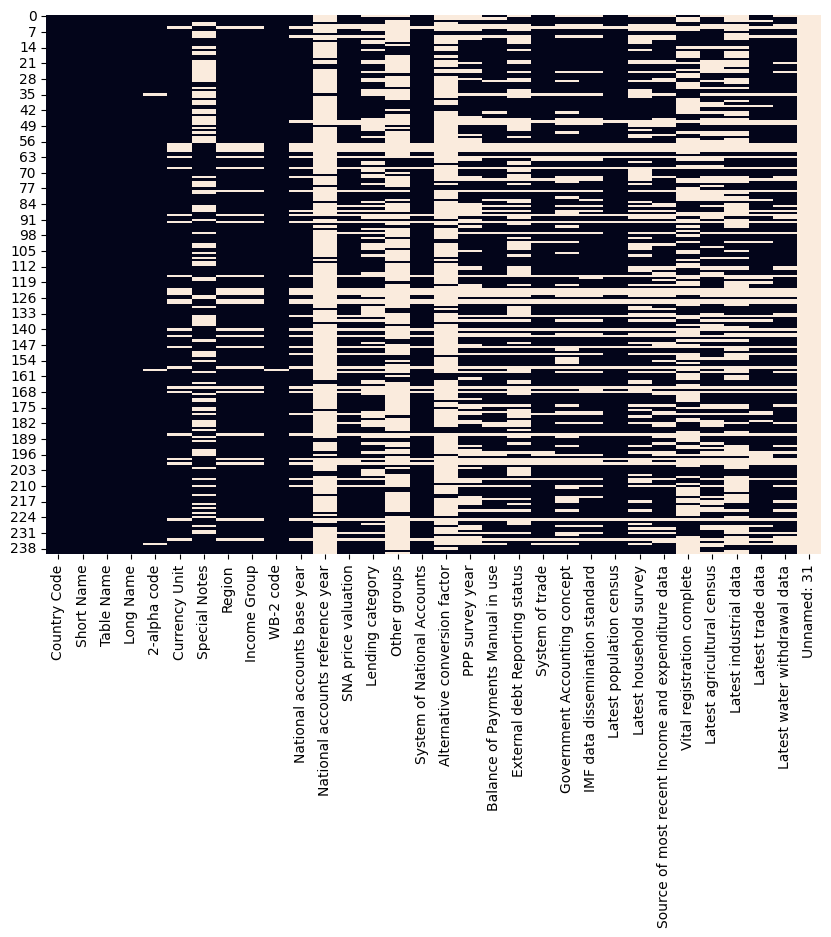

In [38]:
plt.figure(figsize = (10,7))
sns.heatmap(country.isna(),cbar = False)

- D'aprés le heatmap on vois bcp de colonne qui contient des valeurs nulles qui donne pas vraiment des informations interessantes,

In [39]:
# Vérifier le nombre de pays dans EdstatsCountry
all_country = country['Country Code'].unique()
print(f' on trouve {len(all_country)} dans edstatsCountry')

 on trouve 241 dans edstatsCountry


#### afficher les données catégorielles de dataframe country:

In [40]:
for col in country.select_dtypes('object'):
    print(f'{col:-<50},\n {country[col].unique()}')

Country Code--------------------------------------,
 ['ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARB' 'ARE' 'ARG' 'ARM' 'ASM' 'ATG' 'AUS'
 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR'
 'BLZ' 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHI'
 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CUW'
 'CYM' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'EAP' 'EAS' 'ECA'
 'ECS' 'ECU' 'EGY' 'EMU' 'ERI' 'ESP' 'EST' 'ETH' 'EUU' 'FIN' 'FJI' 'FRA'
 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIB' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC'
 'GRD' 'GRL' 'GTM' 'GUM' 'GUY' 'HIC' 'HKG' 'HND' 'HPC' 'HRV' 'HTI' 'HUN'
 'IDN' 'IMN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR' 'JPN'
 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAC' 'LAO' 'LBN' 'LBR'
 'LBY' 'LCA' 'LCN' 'LDC' 'LIC' 'LIE' 'LKA' 'LMC' 'LMY' 'LSO' 'LTU' 'LUX'
 'LVA' 'MAC' 'MAF' 'MAR' 'MCO' 'MDA' 'MDG' 'MDV' 'MEA' 'MEX' 'MHL' 'MIC'
 'MKD' 'MLI' 'MLT' 'MMR' 'MNA' 'MNE' 'MNG' 'MNP' 'MOZ' 'MRT' 'MUS' 'MWI

In [41]:
# liste de code_country pour verifier avec les autre dataset:
code_country = []
for col in country['Country Code']:
    if col not in code_country:
        code_country.append(col)
#print(code_country)

# verification avec dataset EdstatsData:
code_data = []
for col in data['Country Code']:
    if col not in code_country:
        code_data.append(col)
#print(code_data)
''' y'a un indicateur country qui n'est pas dans la liste country code, estr cette indicateur c'est VGB'''

" y'a un indicateur country qui n'est pas dans la liste country code, estr cette indicateur c'est VGB"

In [42]:
# verification avec dataset EdstatsCountry_Series:
code_countryseries = []
for col in country_series['CountryCode']:
    if col not in code_country:
        code_countryseries.append(col)
print(code_countryseries)


[]


-  On trouve meme indicateurs dans dataset country et dataset series

In [43]:
# verification avec dataset EdstatsSeries:
code_note = []
for col in note['CountryCode']:
    if col not in code_country:
        code_note.append(col)
#print(code_note)


In [44]:
country['Region'].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', nan, 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

- On trouve 7 régions

In [ ]:
# Regroupement des pays/régions/groupes de revenus

fig=plt.figure(figsize=(15,10))
grid = plt.GridSpec(2, 2, wspace=0.8, hspace=0.3)


plt.subplot(grid[0, 0])
# Regroupement des pays par régions
nb_pays_par_region=country.groupby('Region')[['Short Name']].count().reset_index().sort_values(by='Short Name', ascending=False)
colors = ['Coral','Peru','HotPink','PowderBlue','Khaki','LightGreen','RoyalBlue','Cyan']
sns.barplot(nb_pays_par_region['Short Name'].sort_values(), nb_pays_par_region['Region'], palette=colors,)
plt.xlabel('Nombre de pays', fontsize=12)
plt.ylabel('Région', fontsize=12)
plt.title('Nombre de pays par Région', fontsize=14)


plt.subplot(grid[0, 1])
# Regroupement des pays par groupe de revenus
nb_pays_par_groupe_revenu=country.groupby('Income Group')[['Short Name']].count().reset_index().sort_values(by='Short Name', ascending=False)
colors = ['FireBrick','RoyalBlue','MediumPurple','MediumSeaGreen','SandyBrown','Khaki']
sns.barplot(nb_pays_par_groupe_revenu['Short Name'].sort_values(), nb_pays_par_groupe_revenu['Income Group'], palette=colors)
plt.xlabel('Nombre de pays', fontsize=12)
plt.ylabel('Groupe de revenus', fontsize=12)
plt.title('Nombre de pays par groupe de revenus', fontsize=14)

plt.show()

***
**Bilan sur le jeu de données EdStatsCountry.csv**: </span>
***

-	La dataset contient des informations géographiques les **noms des pays**, les regroupements pour 7 region, des données économiques globales et des dates de référence des dernières études.
-	Le jeu de données contient **241 lignes et 32 colonnes**.
-	Aucune observation dupliquée sur les noms des pays et les codes pays. 
-	Certaines colonnes sont en float et contiennent des dates (années) : à transformer.
-	La colonne **Unnamed:31** est vide et devra être supprimée.
-	Toutes les régions du monde sont représentées.

___________________________________________________________________________________________________________

In [46]:
# Vérification de nombre d'indicateurs en data:
diff_ind = []
All_indicateur = data['Indicator Code'].unique()
All_indicateur_series = series['Series Code'].unique()
#print(len(All_indicateur))
#print(len(All_indicateur_series))
'''On a le meme nombre d'indicateurs dans la data'''
# vérifier si on a meme indicateur dans les deux dataframe:
for ind in All_indicateur:
    if ind not in All_indicateur_series:
        diff_ind.append(ind)
#print(diff_ind)
print(len(diff_ind))

53


In [47]:
diff = []
for indi in All_indicateur_series:
    if indi not in All_indicateur:
        diff.append(indi)
#print(diff)
print(len(diff))

53


- on comparant les deux liste visuellement on voit que la différence est dans les miniscule et majuscule et puis y'a aussi les espaces:

In [48]:
""" Meilleurs façon de faire et de detection des difference  on utilisant SET"""

print(f'la difference entre indicateur de dataframe series et indicateur de dataframe data sont :\n\n {set(All_indicateur_series) - set(All_indicateur)},\n\n')
print(f'la difference entre indicateur dataframe data et dataframe series sont : \n\n{set(All_indicateur) -set(All_indicateur_series)}')

la difference entre indicateur de dataframe series et indicateur de dataframe data sont :

 {'UIS.LP.Ag65.M', 'UIS.XGDP.1.FSgov.FDinstadm.FFd', 'UIS.GER.1t6.M', 'UIS.LP.Ag15t99', 'UIS.E.4.Pu.F', 'UIS.E.1.Guk', 'UIS.NIR.1.AgM1.F', 'UIS.GER.1t6.GPI', 'UIS.XPubP.4', 'UIS.LPP.Ag65', 'UIS.LR.Ag15t99.GPI', 'UIS.LP.Ag15t99.F', 'UIS.XSpendP.56.Fdpub.Fncap', 'UIS.NIR.1.AgP1.M', 'UIS.thDur.0', 'UIS.E.23.Pu.F', 'UIS.XGDP.0.FSgov.FDinstadm.FFd', 'SE.SEC.DURS.LO ', 'UIS.NIR.1.AgP1.F', 'UIS.XPubP.0', 'UIS.E.1.Pu', 'UIS.NIR.1.AgM1', 'UIS.LP.Ag15t24.F', 'UIS.TranRA.23.GPV.GPI', 'UIS.LPP.Ag15t99', 'UIS.E.23.Pu', 'SE.SEC.ENRR.UP.FE ', 'UIS.XGDP.FSgov.FDinstadm.FFd', 'UIS.LR.Ag65.F', 'UIS.SR.1.Glast.GPI', 'UIS.thAge.3.A.GPV', 'UIS.thDur.4.A.GPV', 'UIS.LP.Ag15t24', 'UIS.NIR.1.AgM1.M', 'UIS.FOSEP.56.Fuk.F', 'UIS.E.2.Pu.F', 'UIS.thAge.4.A.GPV', 'UIS.thAge.0', 'UIS.OE.56.40510 ', 'UIS.CEAge.1', 'UIS.E.1.Guk.F', 'UIS.NIR.1.AgP1', 'UIS.GER.1t6.F', 'UIS.SLE.1t6.GPI', 'UIS.LP.Ag65', 'UIS.LR.Ag65.M', 'UIS.E.4.Pu'

In [49]:
'''on corrige les erreurs de majuscule et de miniscule des deux dataframe :'''
All_indicateur = np.array([ind.upper().strip() for ind in All_indicateur])
All_indicateur_series = np.array([indi.upper().strip() for indi in All_indicateur_series])
print(f' la difference entre les deux apres la correction est : \t{set(All_indicateur) -set(All_indicateur_series)}\n')
print(f' la difference entre les deux apres la correction est : \t{set(All_indicateur_series) -set(All_indicateur)}')

 la difference entre les deux apres la correction est : 	set()

 la difference entre les deux apres la correction est : 	set()


- ON regarde les topic:

In [50]:
topics = series['Topic'].unique()
print(f'il ya {len(topics)} deffirents topics dans dataframe series,')

series1 = series[['Series Code','Topic']].groupby('Topic').count()
series1

il ya 37 deffirents topics dans dataframe series,


,Series Code
Topic,
Attainment,733
Background,2
EMIS,2
Early Child Development (SABER),12
Early Childhood Education,24
Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita,1
Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators,2
Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators,3
Economic Policy & Debt: Purchasing power parity,6


In [51]:
country_series1 = country_series[["CountryCode","SeriesCode"]].groupby('SeriesCode').count()
#country_series1

#### D'aprés les topics : 
on tire les topics interessantes selon notre étude, donc on s'interesse à : 
- Health: Population: Structure 
- population:
- Economic Policy & Debt: Purchasing power parity
- Secondary : 
- Tertiary  : 
- Attainement
- Infrastructure : Communications

#### Les indicateurs dans chaque topics :

### Health: Population: Structure :
- Population, total SP.POP.TOTL

### population:
- Population, ages 15-24, totalSP.POP.1524.TO.UN

### Learning Outcomes:
-  PIAAC: Young adults by proficiency level in problem solving in technology-rich environments (%). No computer experience or      failed the ICT core test LO.PIAAC.TEC.YOU.FAILNO
-  PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). Failed the ICT Core Test LO.PIAAC.TEC.FAIL
-    PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). No computer experience LO.PIAAC.TEC.NO
#### Economic Policy & Debt: Purchasing power parity
- PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). No computer experience NY.GDP.MKTP.PP.CD



#### 	Secondary:
 - Enrolment in upper secondary education, both sexes (number) UIS.E.3
 - Gross enrolment ratio, primary and lower secondary, both sexes (%) 
 - Enrolment in upper secondary general, both sexes (number) UIS.E.3.GPV
 - Adjusted net enrolment rate, upper secondary, both sexes (%)UIS.NERA.3
 - Enrolment in secondary education, both sexes (number) SE.SEC.ENRL
 - Enrolment in secondary general, both sexes (number) SE.SEC.ENRL.GC
 - SE.SEC.ENRR.UP Gross enrolment ratio, upper secondary, both sexes (%)
 ####  	Tertiary
 - Adult literacy rate, population 15+ years, both sexes (%)SE.ADT.LITR.ZS.
 - Enrolment in tertiary education, ISCED 5 programmes, both sexes (number)  UIS.E.5.B
 - Enrolment in tertiary education, ISCED 6 programmes, both sexes (number) UIS.E.6
 - Enrolment in tertiary education, ISCED 7 programmes, both sexes (number) UIS.E.7
 - Enrolment in tertiary education, ISCED 8 programmes, both sexes (number) UIS.E.8
 - Enrolment in tertiary education, all programmes, both sexes (number)  SE.TER.ENRL
 - Gross enrolment ratio, tertiary, both sexes (%) SE.TER.ENRR
 - Graduates from tertiary education, both sexes (number) SE.TER.GRAD
 - Gross graduation ratio from first degree programmes (ISCED 6 and 7) in tertiary education, both sexes (%) SE.TER.CMPL.ZS'

### Infrastructure: communication :
- Internet users (per 100 people):IT.NET.USER.P2.
- Personal computers (per 100 people):IT.CMP.PCMP.P2.

#### Topic : Attainement

 - Percentage of population age 15+ with secondary schooling. Completed Secondary   BAR.SEC.CMPT.15UP.ZS
 - Percentage of population age 15+ with tertiary schooling. Completed Tertiary 	BAR.TER.CMPT.15UP.ZS
 - Percentage of population age 25+ with secondary schooling. Completed Secondary                 BAR.SEC.CMPT.25UP.ZS
 - Percentage of population age 25+ with tertiary schooling. Completed Tertiary     BAR.TER.CMPT.25UP.ZS
 - Percentage of the population age 15+ by highest level of educational attainment. Upper Secondary. Total  PRJ.ATT.15UP.3.MF
 - Percentage of the population age 15+ by highest level of educational attainment. Post Secondary. Total     PRJ.ATT.15UP.4.MF
 - Percentage of the population age 25+ by highest level of educational attainment. Upper Secondary. Total PRJ.ATT.25UP.3.MF
 - Percentage of the population age 25+ by highest level of educational attainment. Post Secondary. Total PRJ.ATT.25UP.4.MF
 - Percentage of the population age 20-24 by highest level of educational attainment. Upper Secondary. Total  PRJ.ATT.2024.3.MF
 - Percentage of the population age 20-24 by highest level of educational attainment. Post Secondary PRJ.ATT.2024.4.MF
 - Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total PRJ.POP.2024.3.MF
 - Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. TotalPRJ.POP.2024.4.MF
 - Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total  PRJ.POP.ALL.3.MF.
 -   Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total PRJ.POP.ALL.4.MF
 - Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary PRJ.ATT.ALL.3.MF
 - Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. PRJ.ATT.ALL.4.MF'
 -  UIS: Percentage of population age 25+ with at least completed upper secondary education (ISCED 3 or higher) UIS.EA.3T6.AG25T99
 - UIS: Percentage of population age 25+ with at least a completed bachelor's or equivalent degree (ISCED 6 or higher) UIS.EA.6T8.AG25T99



- A chaque fois je change l'indicateurs et je vois quelle indicateurs qui a bcp de données par le heatmap

La cible de notre entreprise :
- la population des 15-24 ans, 
- le nombre d'étudiants scolarisés au niveau lycée et universités.
- le niveau de vie des habitants comparable par pays
- les moyens de communication (accès au réseau internet, possession d'un ordinateur personnel).

En parcourant le site de la banque mondiale:

- les différents groupes d'indicateur à étudier sont :
    
    - **SE** : Social Education
    - **SP** : Social Population
    - **IT** : Infrastructure
    - **NY** : National Accounts, produits intérieurs et nationaux
  

- les différents mots clés à rechercher :
    - **15** : pour la cible de la population des 15-19 ans
    - **20** : pour la cible de la population des 20-24 ans
    - **SEC** : pour les regroupements par lycéens
    - **TER** : pour les regroupements par étudiants de l'enseignement supérieur
    - **IT** : pour l'accès aux infrastructures techniques


In [52]:
my_indicators = ['SP.POP.1524.TO.UN','IT.NET.USER.P2','SE.TER.ENRR','SE.SEC.ENRR','NY.GNP.PCAP.PP.CD']


In [53]:
df_pays=data.copy()
df_pays.drop(columns=['Unnamed: 69'],inplace=True)
df_pays.shape
print(f'Nombre de lignes à l\'origine : {df_pays.shape[0]}')

Nombre de lignes à l'origine : 886930


<**Réduction temporelle**>

D'après la description des données de EdStastsData.csv,on s'interesse à une plage d'année 2000-2020 (plus de 94% de NaN pour 2016-2017) mais on verra la suite : **Plage temporelle** retenue : **2000-2020**.    

In [54]:
years = list(df_pays.columns.values[4:])
All_years = np.array([year for year  in years if int(year) >= 2000 and int(year) < 2020])
All_years


array(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017'], dtype='<U4')

In [55]:
df_pays = df_pays.filter(list(df_pays.columns.values[:4]) + list(All_years))
df_pays.head(2)


,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
my_data = df_pays.loc[df_pays['Indicator Code'].isin(my_indicators)]
my_data.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1252,Arab World,ARB,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,8966.476028,9224.632683,9256.850109,9831.654380,10590.896336,11369.476580,...,13824.485684,13852.502783,14284.023177,14996.156034,15846.498202,16141.560252,NaN,NaN,NaN,NaN
1335,Arab World,ARB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,59.745178,61.171799,62.234928,64.037773,65.853859,65.931007,...,65.342293,66.828903,68.050880,70.691490,71.716560,70.274689,70.735046,NaN,NaN,NaN


In [57]:
print(f'Nombre de lignes restantes : {my_data.shape[0]}')

Nombre de lignes restantes : 1210


**Suppression des indicateurs des pays avec aucune donnée pour toutes les années**

In [58]:
my_data.dropna(thresh = 5, inplace=True)
print(f'Nombre de lignes restantes : {my_data.shape[0]}')

Nombre de lignes restantes : 1063


C:\Users\Lynda\AppData\Local\Temp\ipykernel_22776\1127468580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data.dropna(thresh = 5, inplace=True)


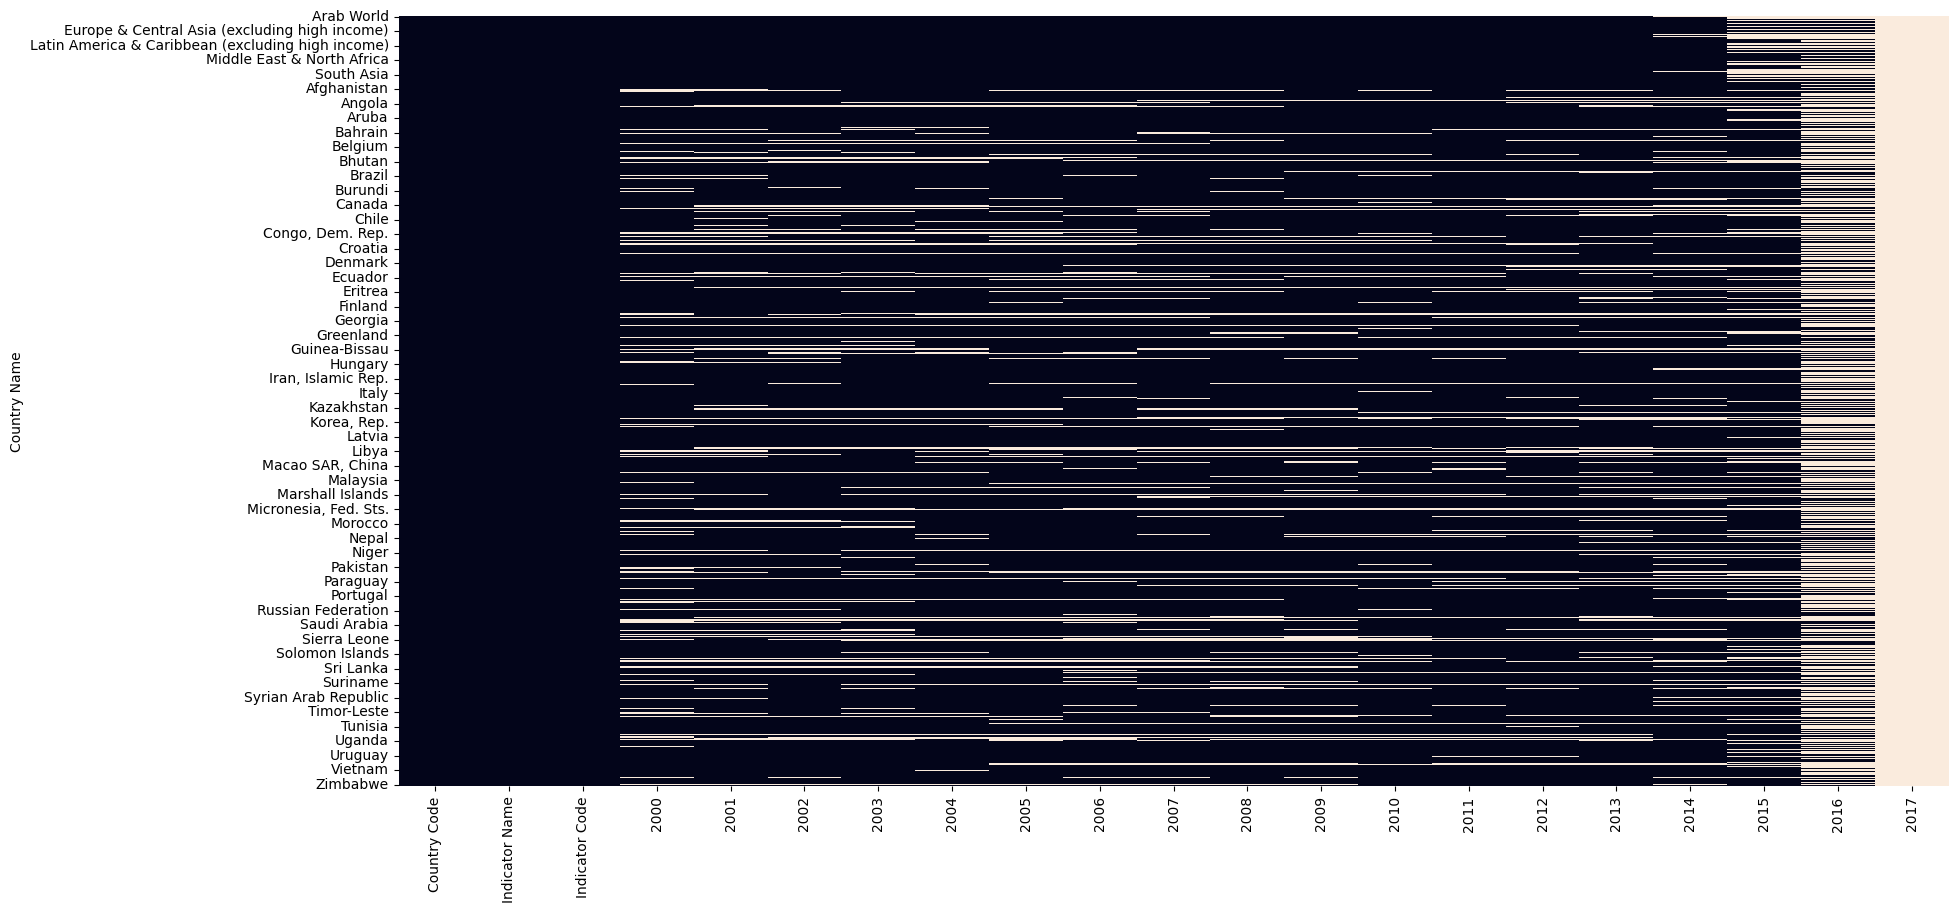

In [59]:
plt.figure(figsize=(20,10))
data_map=my_data.set_index('Country Name')
#data_map
sns.heatmap(data_map.isna(), cbar=False)
plt.show()  

In [60]:
my_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

In [61]:
DATA = pd.merge(my_data,country,on = 'Country Code',how = 'left')
DATA.head(2)


,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,Arab World,ARB,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,8966.476028,9224.632683,9256.850109,9831.654380,10590.896336,11369.476580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,59.745178,61.171799,62.234928,64.037773,65.853859,65.931007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
DATA.drop(['Short Name','2-alpha code',
       'Currency Unit', 'Special Notes', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],axis = 1, inplace = True)

In [63]:
DATA['Country Name'].nunique()

235

In [64]:
DATA.isna().sum()

Country Name         0
Country Code         0
Indicator Name       0
Indicator Code       0
2000               137
2001               124
2002               108
2003               119
2004               105
2005               109
2006               121
2007               115
2008               118
2009               112
2010               113
2011               102
2012               114
2013               135
2014               150
2015               226
2016               626
2017              1063
Table Name           2
Long Name            2
Region             104
Income Group       104
dtype: int64

In [65]:
# je filtre ma data tout en gardons les pays riches et moyennement riche:
income_group = ['Upper middle income', 'High income: nonOECD','Lower middle income', 'High income: OECD']
data_filtre = DATA.loc[DATA['Income Group'].isin(income_group)]
data_filtre.shape

(794, 26)

**Trouve que l'année 2010 comport bcp de donnée paraport aux autre année , on va choisir cette année pour notre étude**

### Année 2010

In [ ]:
df_score_2010 = data_filtre.pivot_table(index = ['Country Name'],columns = 'Indicator Code')['2010']
df_score_2010

- Les statistiques descriptives:

In [ ]:
# Statistiques descriptives
# la moyenne : 
mean_num=df_score_2010['IT.NET.USER.P2'].mean()
mean_eco=df_score_2010['NY.GNP.PCAP.PP.CD'].mean()
mean_edu_sec=df_score_2010['SE.SEC.ENRR'].mean()
mean_edu_ter=df_score_2010['SE.TER.ENRR'].mean()
mean_pop=df_score_2010['SP.POP.1524.TO.UN'].mean()
# la mediane
median_num=df_score_2010['IT.NET.USER.P2'].median()
median_eco=df_score_2010['NY.GNP.PCAP.PP.CD'].median()
median_edu_sec=df_score_2010['SE.SEC.ENRR'].median()
median_edu_ter=df_score_2010['SE.TER.ENRR'].median()
median_pop=df_score_2010['SP.POP.1524.TO.UN'].median()
# la variance
var_num=df_score_2010['IT.NET.USER.P2'].var()
var_eco=df_score_2010['NY.GNP.PCAP.PP.CD'].var()
var_edu_sec=df_score_2010['SE.SEC.ENRR'].var()
var_edu_ter=df_score_2010['SE.TER.ENRR'].var()
var_pop=df_score_2010['SP.POP.1524.TO.UN'].var()

std_num=df_score_2010['IT.NET.USER.P2'].std()
std_eco=df_score_2010['NY.GNP.PCAP.PP.CD'].std()
std_edu_sec=df_score_2010['SE.SEC.ENRR'].std()
std_edu_ter=df_score_2010['SE.TER.ENRR'].std()
std_pop=df_score_2010['SP.POP.1524.TO.UN'].std()

skew_num=df_score_2010['IT.NET.USER.P2'].skew()
skew_eco=df_score_2010['NY.GNP.PCAP.PP.CD'].skew()
skew_edu_sec=df_score_2010['SE.SEC.ENRR'].skew()
skew_edu_ter=df_score_2010['SE.TER.ENRR'].skew()
skew_pop=df_score_2010['SP.POP.1524.TO.UN'].skew()

kurtosis_num=df_score_2010['IT.NET.USER.P2'].kurtosis()
kurtosis_eco=df_score_2010['NY.GNP.PCAP.PP.CD'].kurtosis()
kurtosis_edu_sec=df_score_2010['SE.SEC.ENRR'].kurtosis()
kurtosis_edu_ter=df_score_2010['SE.TER.ENRR'].kurtosis()
kurtosis_pop=df_score_2010['SP.POP.1524.TO.UN'].kurtosis()

data_stats = [['mean',mean_num, mean_eco, mean_edu_sec, mean_edu_ter, mean_pop],
        ['median', median_num, median_eco, median_edu_sec,median_edu_ter,median_pop],
        ['var',var_num, var_eco, var_edu_sec,var_edu_ter,var_pop], ['std',std_num, std_eco,std_edu_sec, std_edu_ter, std_pop], 
        ['skew', skew_num, skew_eco, skew_edu_sec, skew_edu_ter, skew_pop], 
        ['kurtosis', kurtosis_num, kurtosis_eco, kurtosis_edu_sec, kurtosis_edu_ter, kurtosis_pop]]

df_stat = pd.DataFrame(data_stats,columns=['Description','IT.NET.USER.P2','NY.GNP.PCAP.PP.CD','SE.SEC.ENRR','SP.POP.1524.TO.UN','SE.TER.ENRR'])
df_stat

- Les courbes des indicateurs démographiques et économique sont étalées à droite (skewness positif)
- La courbe de l'indicateur éducatif du niveau lycée est bimodale, étalée à gauche (skewness négatif)
- La courbe de l'indicateur éducatif de l'enseignement supérieur est bimodale, étalée à droite (skewness positif)  
- La courbe de l'indicateur numérique est bimodale et plus aplatie que la distribution normale (kurtosis empirique négatif).

In [ ]:
# Liste des pays avec au moins un indicateur manquant
pays_indic_manquant=df_score_2010.isnull().sum(axis=1)
i_pays_indic_manquant=pays_indic_manquant[pays_indic_manquant > 1].index
print(f'Nombre de pays à retirer : {len(i_pays_indic_manquant)}')
df_pays_retires=df_score_2010.loc[i_pays_indic_manquant, :].sort_values(by='SE.SEC.ENRR', ascending=False)


In [ ]:
df_score_2010.dropna(thresh = 4, inplace=True)
print(f'Nombre de pays restant : {df_score_2010.shape[0]}')

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(weights='distance')
knn_imputer = imputer.fit_transform(df_score_2010[['IT.NET.USER.P2','NY.GNP.PCAP.PP.CD','SE.SEC.ENRR','SE.TER.ENRR','SP.POP.1524.TO.UN']])
df_score_2010[['IT.NET.USER.P2','NY.GNP.PCAP.PP.CD','SE.SEC.ENRR','SE.TER.ENRR','SP.POP.1524.TO.UN']] = knn_imputer


In [ ]:
cols = ['IT.NET.USER.P2','NY.GNP.PCAP.PP.CD','SE.SEC.ENRR','SE.TER.ENRR','SP.POP.1524.TO.UN']

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler_std = StandardScaler()
scaled_df_std= scaler_std.fit_transform(df_score_2010[cols])
scaled_df_std = pd.DataFrame(scaled_df_std, columns=cols)



In [ ]:
scaled_df_std['Country Name'] = df_score_2010.index
scaled_df_std

In [ ]:
scaled_df_std['score'] = [((row[0] + row[1] + row[2]+row[3]+row[4])) 
                        for row in zip(scaled_df_std['IT.NET.USER.P2'],
                            scaled_df_std['NY.GNP.PCAP.PP.CD'],
                            scaled_df_std['SE.SEC.ENRR'],
                            scaled_df_std['SE.TER.ENRR'],
                            scaled_df_std['SP.POP.1524.TO.UN'])]

scaled_df_std.sort_values(by='score', ascending=False)

** Top 10 des pays attractifs**

In [ ]:
df_top10_prov = scaled_df_std[['Country Name','score']].sort_values(by='score',ascending=False).head(10)
df_top10_prov['Place Provisoire']=np.arange(1, 11, 1)
df_top10_prov['Country Name'].tolist
df_top10_prov

### Prediction pour les annéees 2000-2017

In [ ]:
data_score_pred= data_filtre.copy()
data_score_pred=data_score_pred[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014','2015','2016']]


In [ ]:
pays_top10=df_top10_prov['Country Name'].tolist()
#pays_top10

In [ ]:
country_top10=data_score_pred.loc[data_score_pred['Country Name'].isin(pays_top10)]



In [ ]:
datamelt =country_top10.melt(id_vars = ['Country Name','Indicator Code'],value_vars =['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016'])
datamelt

In [ ]:
datamelt.rename(columns = {'variable': 'Year','value': 'Value'}, inplace = True)
datamelt

In [ ]:
pivot = datamelt.pivot_table(index = ['Country Name','Year'],columns = 'Indicator Code', values = 'Value')
pivot

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(weights='distance')
knn_imputer = imputer.fit_transform(pivot[['IT.NET.USER.P2','NY.GNP.PCAP.PP.CD','SE.SEC.ENRR','SE.TER.ENRR','SP.POP.1524.TO.UN']])
pivot[['IT.NET.USER.P2','NY.GNP.PCAP.PP.CD','SE.SEC.ENRR','SE.TER.ENRR','SP.POP.1524.TO.UN']] = knn_imputer


In [ ]:
pivot = pivot.reset_index()
pivot

In [ ]:
pivot.shape

In [ ]:
pivot.isna().sum()

In [ ]:
pivot.describe()

### visualisation

In [ ]:
plt.figure(figsize = (12,8))
for CountryName in pivot['Country Name'].unique():
    df = pivot[pivot['Country Name'] == CountryName]
    plt.plot(df['Year'],df['IT.NET.USER.P2'], label = CountryName,marker = 'o')
plt.title('Prédiction de l\'indicateur numérique IT.NET.USER.P2 pour les top 10 pays')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (12,8))
for CountryName in pivot['Country Name'].unique():
    df = pivot[pivot['Country Name'] == CountryName]
    plt.plot(df['Year'],df['NY.GNP.PCAP.PP.CD'], label = CountryName,marker = 'o')
plt.title('Prédiction de l\'indicateur économique NY.GNP.PCAP.PP.CD pour les top 10 pays')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (12,8))
for CountryName in pivot['Country Name'].unique():
    df = pivot[pivot['Country Name'] == CountryName]
    plt.plot(df['Year'],df['SP.POP.1524.TO.UN'], label = CountryName,marker = 'o')
plt.title('Prédiction de l\'indicateur démographique SP.POP.1524.TO.UN pour les top 10 pays')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (12,8))
for CountryName in pivot['Country Name'].unique():
    df = pivot[pivot['Country Name'] == CountryName]
    plt.plot(df['Year'],df['SE.SEC.ENRR'], label = CountryName,marker = 'o')
plt.title('Prédiction de l\'indicateur éducatif lycée SE.SEC.ENRR pour les top 10 pays')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (12,8))
for CountryName in pivot['Country Name'].unique():
    df = pivot[pivot['Country Name'] == CountryName]
    plt.plot(df['Year'],df['SE.TER.ENRR'], label = CountryName,marker = 'o')
plt.title('Prédiction de l\'indicateur éducatif enseignement supérieur SE.TER.ENRR pour les top 10 pays')
plt.legend()
plt.show()

### Classement final : 
- 1er : United States
- 2ème : Norway
- 3éme : Australia
- 4ème : Netherlands
- 5ème : Denmark
- 6ème : Finland		
- 7éme : China
- 8éme : New Zealand
- 9éme : Korea, Rep
- 10éme : Iceland


Analyse des graphe:

- Les graphiques montrent que la population des 15-24 ans a une tendance de stagener (comme presque tous les pays)
(une population trés importante pour la chine et pour les états unis un peux dans la moyenne mais pour d'autre pays c'est très faible).
- le taux d'utilisateur d'internet a une tendance croissante faible(  surtout la chine à partir année 2016).
- le taux de scolarisation au niveau lycée en augmentation légère au dire se tagene dans la moyenne  pour certains pays mais est compensé par le taux de scolarisation dans l'enseignement supérieur(a une tendance- de coissance si on compare avec les etude en lycée)

- la population de 15-24 ans est 2 fois plus importante donc un vivier plus grand d'élève. Le potentiel du taux de scolarisation dans le secondaire est favorable pour la chine,

Pour la troisième place, le score prédit pour l'Australia , montre un plus fort potentiel que celui de Korea, Rep. les taux de scolarisation sont forts pour  les deux pays(etude université mais lycée peux important pour la coré a celui de l'australie). Comme les Etats-Unis ,l'Australie ont la même langue commune, le choix de l'**Australie** sera privilégié. Il faudrait recueillir des données sur la concurrence déjà présente en Corée du Sud, pouvoir prédire si les formations en anglais ne seraient pas un frein ou si notre entreprise souhaite donner des cours dans plusieurs langues.

*Notes* :
***
-  le fort potentiel d'évolution de la Corée du Sud et la présence du Japon . Ces pays représentant la région 'East Asia & Pacific' pourront être des pays à fort potentiel sur le plus long terme.
